<a href="https://colab.research.google.com/github/Sagarjain93/Pharma_Medicines/blob/main/Pharma_medicines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Tite: Exploratory Analysis of Indian Pharmaceuticals Dataset**

#**1. Introduction**

This EDA aims to uncover patterns, distributions, and insights from a dataset of 253,973 medicines available in India. The dataset includes key features like product ID, name, price, manufacturer, type, packaging, and composition details. Through data profiling, visualizations, and summary statistics, we explore product availability, pricing trends, formulation completeness, and market diversity in the Indian pharmaceutical space.

**Potential Hypotheses to be explored **

**1.Higher-priced medicines are more likely to be discontinued.**
(Test by comparing price distributions across the Is_discontinued flag.)

**2.Some manufacturers dominate the market with a higher number of products.**
(Test by analyzing the frequency distribution of manufacturer_name.)

**3.Certain medicine types (e.g., tablets) are more common than others.**
(Test by checking the distribution of the type column.)

**4.Combination drugs (with short_composition2) tend to be more expensive.**
(Compare average price between entries with and without short_composition2.)

**5.Pack size is correlated with medicine price.**
(Extract numeric info from pack_size_label and check correlation with price(₹).)

**6.Discontinued medicines are more likely to come from lesser-known manufacturers.**
(Compare discontinuation rates across manufacturers.)



# **2. Dataset Description:**

**id** Unique identifier for each medicine entry.

**name**: Name of the medicine or drug product.

**price(₹)**: Price of the medicine in Indian Rupees.

**Is_discontinued**: Boolean flag indicating whether the medicine is discontinued (True) or still available (False).

**manufacturer_name**: Name of the company or brand that manufactures the medicine.

**type**: Form/type of the medicine (e.g., tablet, syrup, capsule).

**pack_size_label**: Label describing the packaging size or quantity (e.g., "10 tablets", "100 ml").

**short_composition1**: Primary active ingredient(s) in the medicine.

**short_composition2**: Secondary or additional active ingredient(s); may contain missing values.

# **3. Import Required Libraries**



We import Python libraries necessary for data manipulation and visualization

In [ ]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent theme for all plots
sns.set(style = 'whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **4. Load The Dataset**



The dataset is loaded using the pandas library. The dataset has been uploaded to a GitHub repository. This approach allows the CSV file to be accessed directly via its raw URL, making the code cleaner and removing the need for manual authorization or drive mounting each time the notebook is run.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/colab/eda/4. Pharma/MEDICINE DATASET/A_Z_medicines_dataset_of_India.csv')

#**5. Inital Data Inspection**

To gain a foundational understanding of the dataset, we begin with an initial inspection that covers several essential aspects. This includes previewing the first few records to get a sense of the structure and values, examining the data types of each feature to ensure they align with expectations, and reviewing the overall shape and completeness of the dataset. We also generate statistical summaries for both numerical and categorical features to identify distributions, detect potential anomalies, and guide further steps in the analysis pipeline.

##**5.1 Preview Few Records**

### First Few Rows View

In [ ]:
df.head()

### Last Few Rows View

In [ ]:
df.tail()

### Columns

In [ ]:
df.columns

##**5.2 Check the Dataset Shape And Size**

### Shape Of Dataset

In [ ]:
df.shape

**Interpretation**- *The data has 253973 rows and 9 columns*

### Size Of Dataset

In [ ]:
df.size

##**5.3 Dataset Summary Overview**

Check for missing values and data types of each column.

###Data Information

In [ ]:
df.info()

**Interpretation**- *The dataset contains 253,973 records and 9 columns, covering medicine ID, name, price, manufacturer, type, pack size, and composition details. One column (short_composition2) has missing values. Data types include integers, floats, booleans, and object strings.*

###Data Types

In [ ]:
df.dtypes

##**5.4 Statistical Summary Of Dataset**

Generating statistical summary of numerical columns to understand their distribution, central tendency, and spread across the dataset

### Statistical Summary Of Numerical Columns

In [ ]:
df.select_dtypes(include='number').describe().round()

### Statistical Summary of Category Columns

In [ ]:
df.select_dtypes(include='object').describe()

##**5.5 Check For Duplicates , Null Values,Unique Values**

### Check Duplicates Row

In [ ]:
df.duplicated().sum()

### Check Null Values /Nan Values

In [ ]:
df.isnull().sum()

### Unique Values

In [ ]:
df.nunique()  # Display the number of unique values in each column

In [ ]:
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts(dropna=False))  # dropna=False includes NaNs
    print("-"*50)


#**6. Data Cleaning And Preprocessing**

In this section, we focus on identifying and handling issues such as missing values, incorrect data types, duplicates, and inconsistent entries. Effective data cleaning ensures the dataset is accurate, complete, and ready for reliable analysis

##**6.1 Handling Missing Values**

Identifying and addressing missing values to ensure data completeness and reliability for accurate analysis.

In [ ]:
df.isnull().sum()

**Interpretation** - * The above data shows that the column short_composition2 has 141802 null data*

**Using Fillna() to replace the empty cell with 'NA'.**

In [ ]:
#using fillna to replace the empty cell in the short_composition2 column
df['short_composition2'] = df['short_composition2'].fillna('NA')

##**6.2 Standardize Column Name**

Standardizing column names to ensure consistency, readability, and ease of use throughout the analysis.

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [ ]:
df.columns

##**6.3 Identify Numerical And Categorical Columns**

Identifying numerical and categorical columns to guide appropriate analysis, visualization, and preprocessing techniques.

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(include='number').columns

In [ ]:
# Display categorical columns
categorical_columns

In [ ]:
# Display numerical columns
numerical_columns

##**6.4 Standardize Categorical Features And Explore Unique Values**

In this section, we clean the categorical columns by standardizing text formats—removing extra spaces and ensuring consistent casing. This step is essential to avoid misleading results when analyzing unique categories. After cleaning, we explore the unique values in each categorical column to understand the feature space and identify any anomalies or inconsistencies.

### Standardizing Categorical Features

In [ ]:
# Clean categorical columns: strip whitespaces and lowercase all strings
for cols in categorical_columns:
  df[cols] = df[cols].str.strip().str.lower()

### Explore Unique Values in Categorical Features

In [ ]:
for col in categorical_columns:
  print(f"Unique Values in {col}:")
  print(df[col].unique())
  print("\n")

##**6.5 Outlier Detections for Numerical Features**

In this step, we investigate potential outliers in the numerical columns using boxplots. Outliers can indicate data entry errors or unusual behavior.

### Visualizing Outlier Through BoxPlots

In [ ]:
# Set up figure size
plt.figure(figsize=(5 * len(numerical_columns), 5))  # Dynamic width

# Loop through each numerical column and plot a boxplot
for i, col in enumerate(numerical_columns):
    # Create dynamic subplots (1 row, N columns)
    plt.subplot(1, len(numerical_columns), i + 1)

    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()

**Interpretation**

**Boxplot of id:**

The id values are uniformly spread across the dataset.

As expected for a unique identifier, it shows no outliers or skewness.

This column should be treated as an identifier only, not used for analysis or modeling.

**Boxplot of price(₹):**

There is heavy right skew indicating a large number of high-price outliers.

Most medicine prices lie in a lower range, but a few medicines are priced above ₹100,000 and even ₹400,000.

These extreme values may distort summary statistics like mean — consider using the median or log transformation for analysis.

### Statistical Detection of Outliers using IQR

In addition to visual inspection through boxplots, we use the IQR method to programmatically detect potential outliers in the numerical features. This helps in identifying the number and position of values that lie far outside the normal range and could distort our analysis.


In [ ]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25%)
    Q3 = data[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1                     # Interquartile range
    lower_bound = Q1 - 1.5 * IQR      # Lower limit for non-outliers
    upper_bound = Q3 + 1.5 * IQR      # Upper limit for non-outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Loop through numerical columns and report number of outliers in each
for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers detected")

# **7. Data Visualization**

## **Univariate Analysis**

### Chart-1 Top 20 Most Frequent Product Names

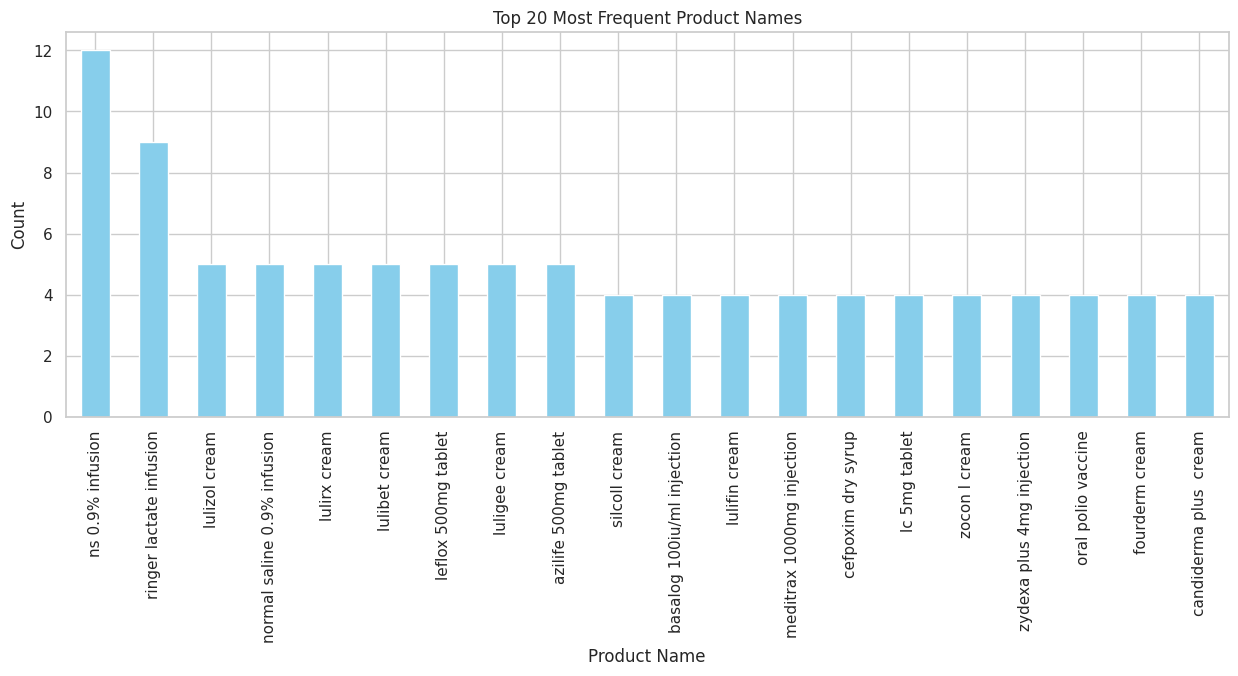

In [48]:
# Chart No.1  Data Visualization
df['name'].value_counts().head(20).plot(kind='bar', figsize=(15,5), color='skyblue')
plt.title("Top 20 Most Frequent Product Names")
plt.xlabel("Product Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


#### Why did you pick the specific chart?


*  **Name** is categorical. Bar chart shows which products are most common in the dataset.

####What is/are the insight(s) found from the chart?


*  **NS 0.9% Infusion** is the most frequent product, with 12 counts.

*  **Ringer Lactate Infusion** follows closely with 9 counts.

*  Most other products have a frequency between 4 to 5 counts.

*  Infusion products and creams appear more frequently than syrups, tablets, or vaccines, indicating higher demand for those categories.

####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Businesses can prioritize stocking high-demand products like **NS 0.9% Infusion** and **Ringer Lactate Infusion** to avoid shortages.

*  Helps in inventory management by focusing on fast-moving products.

*  Supports sales forecasting and procurement planning by knowing which products are consistently in demand.

**Negative Insights**


*  Products with lower demand (only 4 counts each) such as candiderma plus cream, oral polio vaccine, fourderm cream, etc., may lead to overstocking issues if procured in bulk.

*  Overstocking low-demand items ties up capital and can cause wastage (especially for medicines with expiry dates).

*  Focusing only on high-demand products may also reduce product diversity, potentially losing customers who come for niche medicines.

### Chart-2 Price Distribution

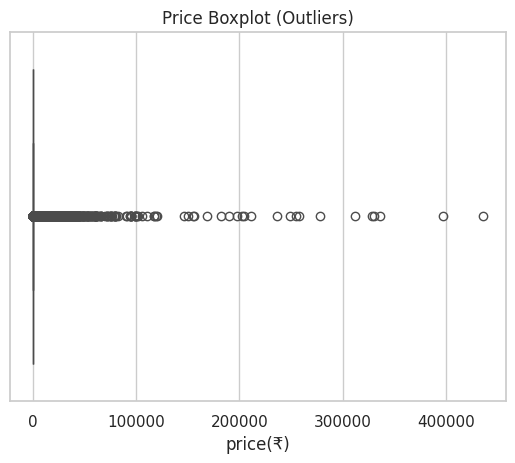

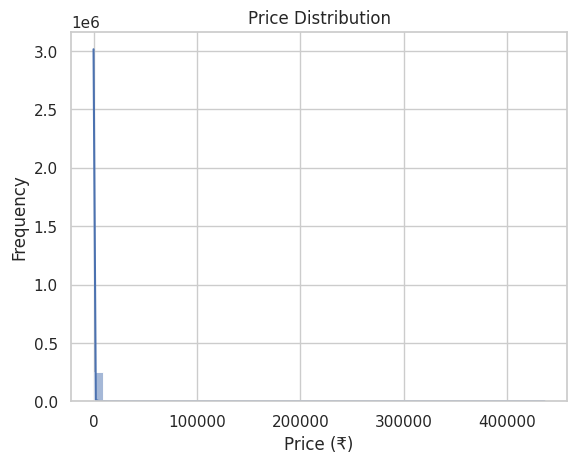

In [49]:
# Chart No.2  Data Visualization

# Boxplot for outliers
sns.boxplot(x=df['price(₹)'])
plt.title("Price Boxplot (Outliers)")
plt.show()

sns.histplot(df['price(₹)'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.show()


#### Why did you pick the specific chart?


Histogram shows price distribution, KDE gives density; boxplot highlights outliers.

####What is/are the insight(s) found from the chart?


*  The majority of products are clustered around lower price ranges (close to ₹0–₹10,000).

*  There are many extreme outliers, with some prices going above ₹4,00,000.

*  The spread is highly skewed, meaning only a few products are extremely costly compared to the bulk of products.

####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  The company can identify high-value outlier products that may contribute disproportionately to revenue.

*  Knowing that most products fall in a low–mid price range helps in targeting bulk buyers like hospitals and pharmacies.

*  Outlier detection ensures the business can validate pricing errors (e.g., mistakenly entered high values) and correct them before they affect reporting.

**Negative Insights:**

*  Over-reliance on high-priced products (outliers) can be risky because demand is usually low for such items.

*  Data quality issue: Some extreme prices may be due to wrong data entry rather than actual product cost. This can mislead analysis and decision-making.

### Chart-3 Count Of Discontinued Vs Active Products

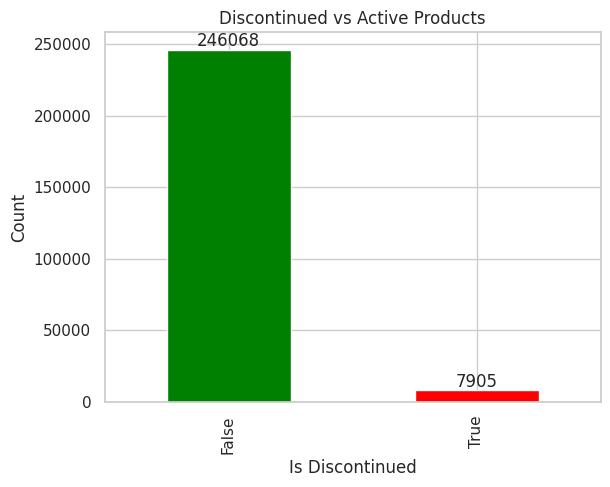

In [50]:
# Chart No.3  Data Visualization
# Plot
ax = df['is_discontinued'].value_counts().plot(kind='bar', color=['green','red'])
plt.title("Discontinued vs Active Products")
plt.xlabel("Is Discontinued")
plt.ylabel("Count")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.show()

#### Why did you pick the specific chart?


Bar chart clearly shows the proportion of discontinued products.

####What is/are the insight(s) found from the chart?


*  Out of the total products:

    246,068 are Active (green bar)

    7,905 are Discontinued (red bar)

*  The majority (~97%) of products are still active, showing a healthy product portfolio.

*  A small proportion (~3%) have been discontinued, which is expected in product lifecycles.

####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  The company can be confident that most products are still in circulation, which means ongoing revenue opportunities.

*  By analyzing why the 7,905 products were discontinued (low demand, high cost, regulations, expiry, etc.), the business can learn and avoid repeating mistakes.

**Negative Insights:**

*  If discontinued products were still in demand, this could lead to lost sales opportunities and customer dissatisfaction.

*  If the reasons for discontinuation are not well-documented, the company may risk repeating failures with new product launches.

### Chart-4 Top 20 Manufacturers

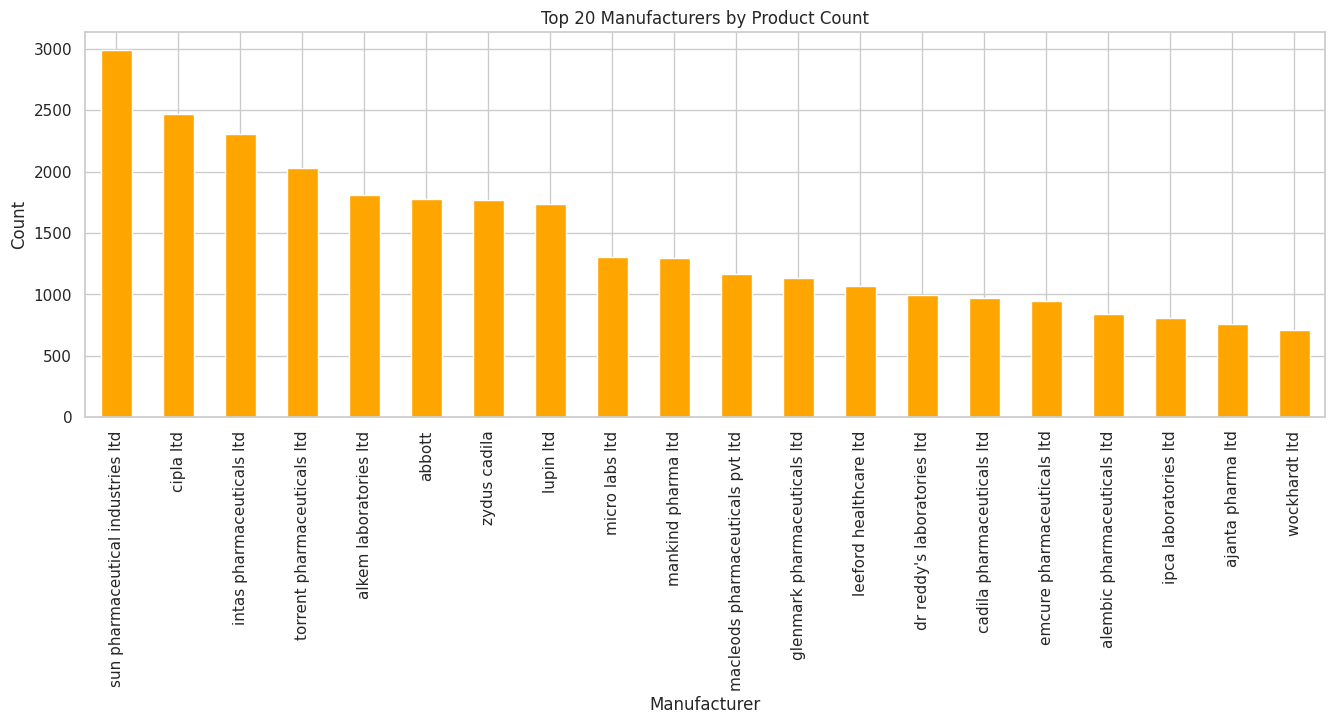

In [51]:
# Chart No.4  Data Visualization
df['manufacturer_name'].value_counts().head(20).plot(kind='bar', figsize=(16,5), color='orange')
plt.title("Top 20 Manufacturers by Product Count")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

#### Why did you pick the specific chart?


I picked a bar chart because it is ideal for comparing categorical variables (manufacturers) based on the number of products they produce. It gives a clear view of which manufacturers dominate in terms of product count.

####What is/are the insight(s) found from the chart?


*  Sun Pharmaceutical Industries Ltd is the market leader with around 3,000 products, far ahead of others.

*  Cipla Ltd (2,400+) and Intas Pharmaceuticals Ltd (2,300+) also have very strong portfolios.

*  Other big players include Torrent, Alkem, Abbott, Zydus Cadila, Lupin, all having 1,700–2,000 products.

*  The rest (like Wockhardt, Ajanta, Ipca) have below 1,000 products, showing a more limited portfolio.

*  Overall, the market is dominated by a few large players, with a steep drop after the top 3.

####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Companies can identify key competitors and benchmark themselves against top players.

*  Helps in strategic partnerships (e.g., distributors may prefer stocking products from manufacturers with a wide portfolio).

*  For smaller manufacturers, this chart highlights the gap to fill in order to remain competitive.

**Negative Insights:**

*  Over-concentration risk: The market is dominated by a few large players. Smaller companies may struggle with visibility and market share.

*  Companies with a smaller product count may face challenges in scaling up, competing in distribution networks, and building brand trust compared to big players.

### Chart-5 Count Of Each Product Type

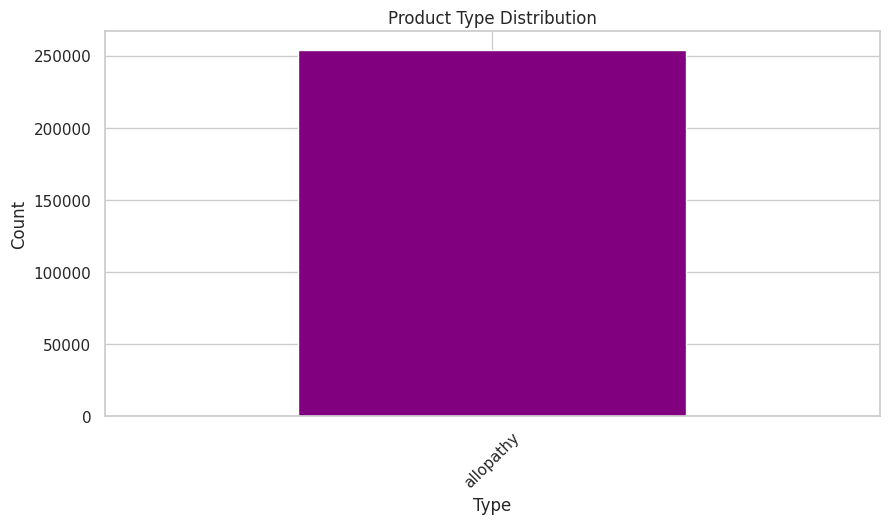

In [52]:
# Chart No.5  Data Visualization
df['type'].value_counts().plot(kind='bar', figsize=(10,5), color='purple')
plt.title("Product Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Why did you pick the specific chart?


I picked a bar chart because it is simple and effective to show how many products belong to each type/category. In this case, it shows the dominance of Allopathy in the dataset.

####What is/are the insight(s) found from the chart?


*  All products in the dataset are Allopathy (≈2.5 lakh products).

*  There is no presence of alternative medicine types (Ayurveda, Homeopathy, Herbal, etc.).

*  This highlights a complete dependency on allopathy products in the current dataset.

####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Shows a clear focus area: all resources, marketing, and sales strategies can be optimized for the allopathy segment.

*  Easier to build specialized expertise in a single product category.

**Negative Insights:**

*  Lack of diversification: Since the portfolio contains only allopathy products, the business is missing out on growing demand for Ayurveda, Homeopathy, Nutraceuticals, and Herbal products, especially in India and global wellness markets.

*  If regulatory or supply chain issues affect allopathy medicines, the business has no backup in alternative medicine categories, creating a dependency risk.

### Chart-6 Frequency Of Top 20 Packaging Sizes

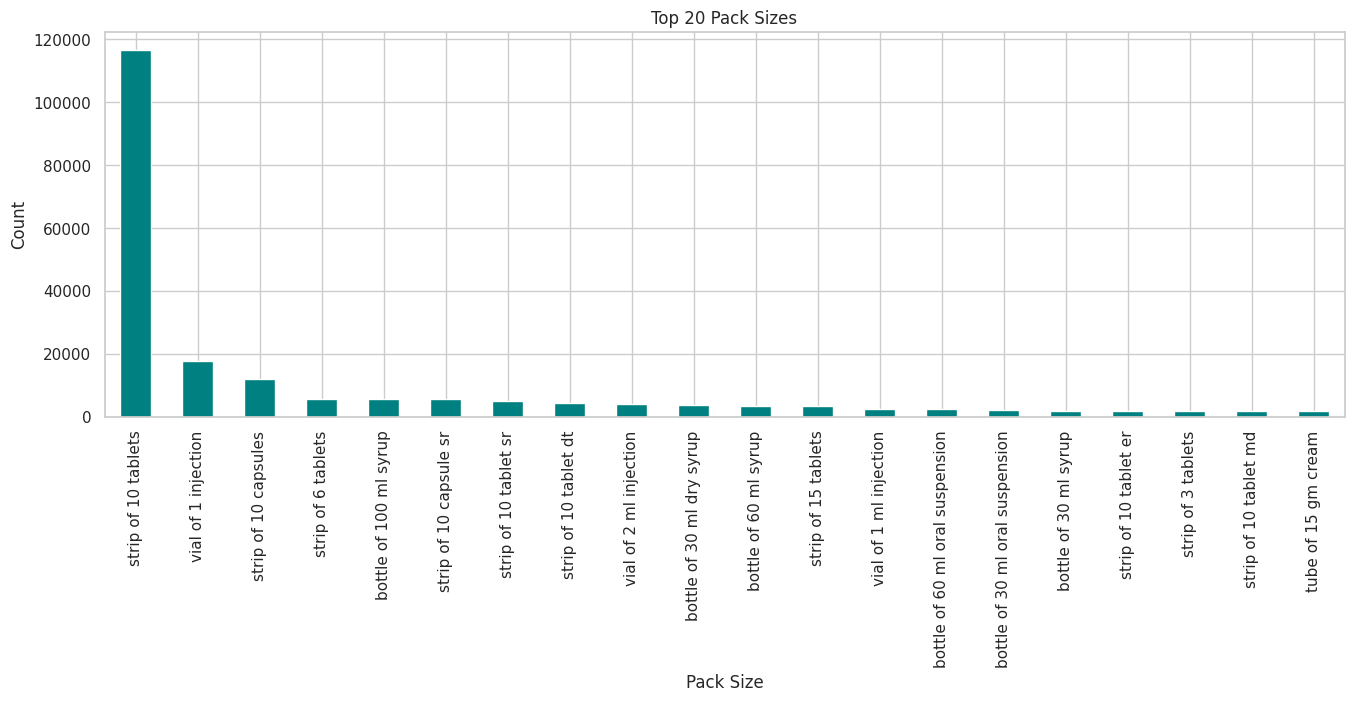

In [53]:
# Chart No.6  Data Visualization
df['pack_size_label'].value_counts().head(20).plot(kind='bar', color='teal',figsize=(16,5))
plt.title("Top 20 Pack Sizes")
plt.xlabel("Pack Size")
plt.ylabel("Count")
plt.show()

#### Why did you pick the specific chart?


*  A bar chart is the best choice here since you’re comparing categorical values (pack sizes) against their frequencies (counts).

####What is/are the insight(s) found from the chart?


*  Strip of **10 tablets** dominates with an extremely high count (~117K), far ahead of any other pack size.

*  Vial of 1 injection and strip of 10 capsules are the next most common but are still much smaller in comparison.

*  The rest of the pack sizes have relatively evenly distributed lower counts, showing that they are used but not nearly as frequently.

*  The distribution is highly skewed, showing a strong industry preference for 10-tablet strips as the standard packaging unit.

####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Knowing that strip of 10 tablets is the dominant packaging choice helps companies optimize production, procurement, and logistics around it.

*  For inventory management, businesses can prioritize stocking and forecasting demand for these top pack sizes, reducing stockouts or overstocking.

**Negative Market Insights:**

*  Over-dependence on a single pack size (10 tablets) could mean less flexibility in catering to niche needs (e.g., smaller or larger prescriptions).

*  Underutilized pack sizes (like tube of 15 gm cream, strip of 3 tablets, etc.) may lead to higher storage costs without proportional sales.

### Char-7 Top 20 Most Common Primary Ingredients Used In Medicines

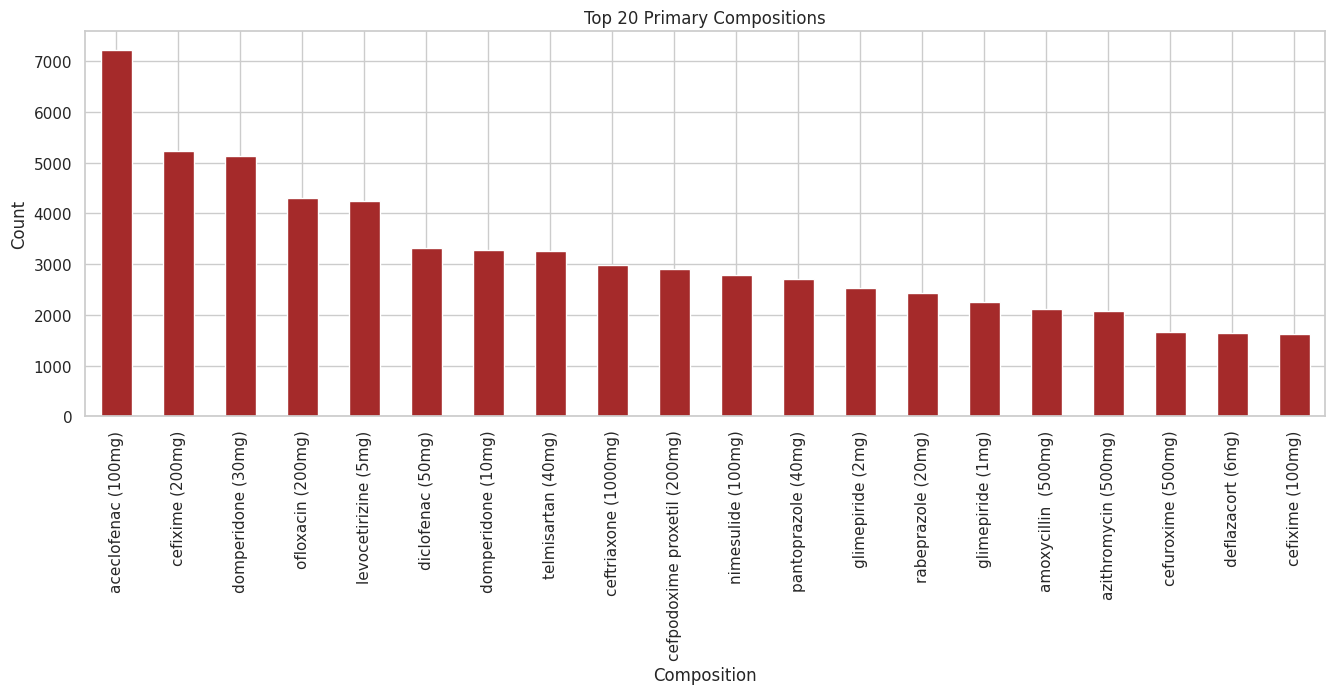

In [54]:
# Chart No.7  Data Visualization
df['short_composition1'].value_counts().head(20).plot(kind='bar', color='brown',figsize=(16,5))
plt.title("Top 20 Primary Compositions")
plt.xlabel("Composition")
plt.ylabel("Count")
plt.show()


#### Why did you pick the specific chart?


*  A bar chart is the best choice here because it clearly compares the frequency (count) of the top 20 primary drug compositions.

*  It helps identify which medicines are prescribed/sold the most and which are less common.

####What is/are the insight(s) found from the chart?


*  **Aceclofenac (100mg)** is the most common composition (~7200 counts), far ahead of others.

*  **Cefixime (200mg) and Domperidone (30mg)** also have high counts (~5100 each).

*  There’s a long tail of medicines with decreasing counts, e.g., **Deflazacort (6mg), Cefixime (100mg), etc.**

*  Antibiotics (like **Cefixime, Ceftriaxone, Amoxicillin, Azithromycin**) are highly frequent, indicating higher demand for infection-related treatments.

*  Analgesics/anti-inflammatory drugs (**Aceclofenac, Diclofenac, Nimesulide**) also dominate, showing pain & inflammation management is common.

####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Helps pharma companies optimize production based on high-demand drugs.

*  Enables pharmacies to keep sufficient stock of top-selling medicines.

*  Doctors can cross-check if prescription patterns align with disease trends.

*  Insights can support forecasting demand and reducing shortages.

**Negative Insights:**

*  Over-dependence on a few drugs (Aceclofenac, Cefixime) may cause supply chain risks if shortages occur.

*  High antibiotic usage may signal over-prescription, leading to antibiotic resistance – a long-term threat.

*  Low demand for some drugs might mean stock wastage if not managed properly.

### Chart-8 Top 20 Most Common Secondary Ingredients Used In Medicines

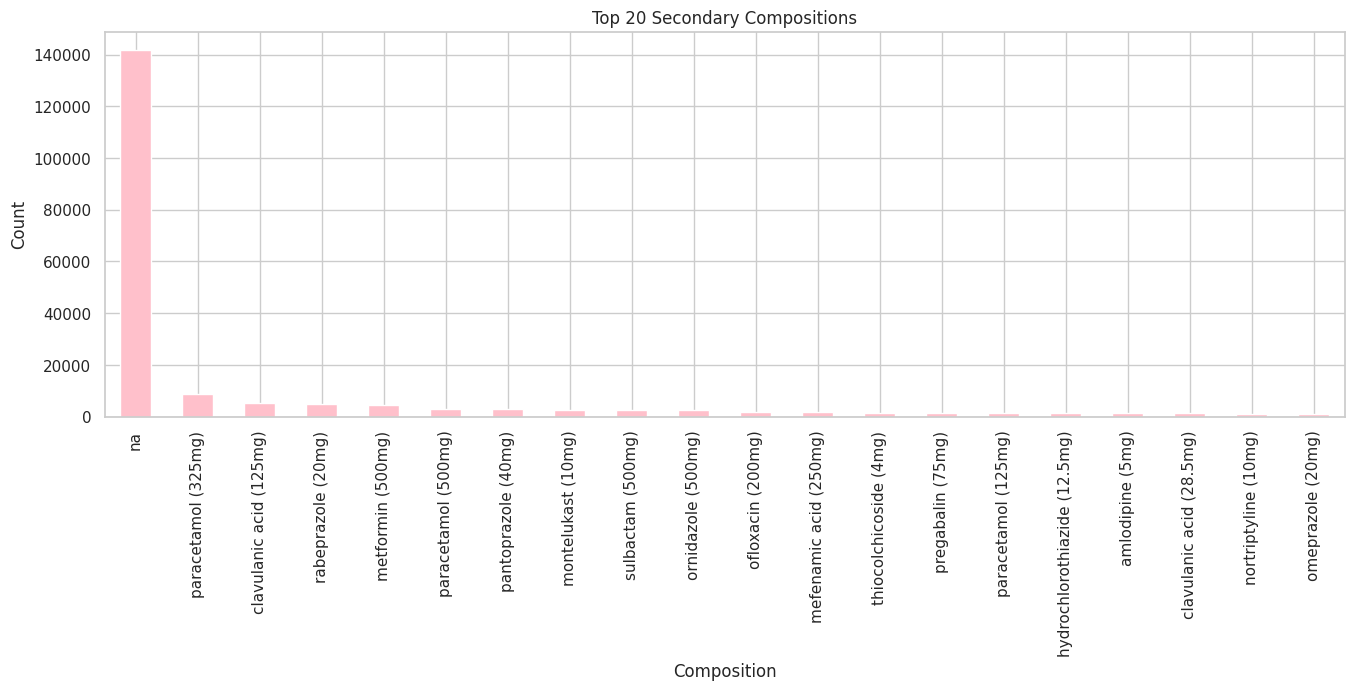

In [55]:
# Chart No.8  Data Visualization

# Top 20 secondary ingredients
df['short_composition2'].value_counts().head(20).plot(kind='bar', color='pink',figsize=(16,5))
plt.title("Top 20 Secondary Compositions")
plt.xlabel("Composition")
plt.ylabel("Count")
plt.show()

#### Why did you pick the specific chart?


*  I picked a bar chart because it is the most effective way to compare the frequency (counts) of categorical values like secondary drug compositions. The chart allows us to quickly see which compositions dominate and how the top 20 compare to each other.

####What is/are the insight(s) found from the chart?


*  A huge number of entries have "na" as the secondary composition, showing missing or unspecified data.

*  Among actual compositions, **Paracetamol (325mg)** is the most common secondary composition.

*  Other frequently appearing compositions include **Clavulanic Acid (125mg), Rabeprazole (20mg), Metformin (500mg), and Pantoprazole (40mg).**

*  There is a long tail distribution — after the top 3–5 compositions, the frequency of others drops significantly.

####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Knowing the most prescribed or common secondary compositions helps in better inventory management and forecasting demand.

*  Identifying missing "na" values highlights data quality issues, which, if fixed, could improve business intelligence and reporting accuracy.

## **Bivariate Analysis**

### *Numerical Vs Numerical Analysis*

### Chart-9 Price Distribution By Pack Size

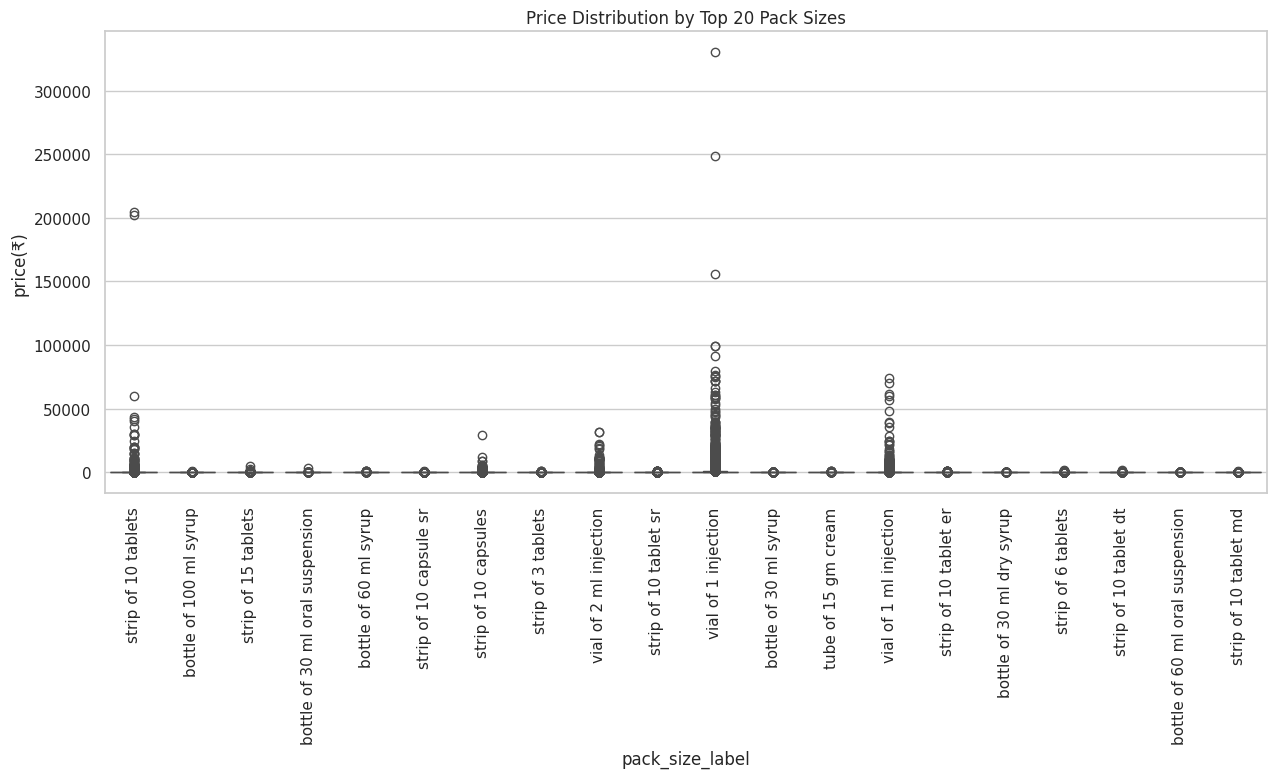

In [56]:
# Chart No.9  Data Visualization
# Get top 20 pack sizes by frequency
top_pack_sizes = df['pack_size_label'].value_counts().head(20).index

# Filter the dataframe
df_top_pack = df[df['pack_size_label'].isin(top_pack_sizes)]

# Plot
plt.figure(figsize=(15,6))
sns.boxplot(x='pack_size_label', y='price(₹)', data=df_top_pack)
plt.xticks(rotation=90)
plt.title("Price Distribution by Top 20 Pack Sizes")
plt.show()

#### Why did you pick the specific chart?


*  A boxplot is ideal when we want to understand the spread, variation, and outliers in prices across different pack sizes.

####What is/are the insight(s) found from the chart?


*  High variation in injections:

    **Vial of 1 ml injection and Vial of 2 ml injection** show extremely high price ranges, with outliers crossing ₹3,00,000.

    This indicates some specialty injections are very expensive compared to average medicines.

*  Tablets & syrups are cheaper and consistent:

    **Strip of 10 tablets, Bottle of 30/60/100 ml syrup, and Bottle of oral suspension** mostly cluster near lower prices, showing affordable and stable pricing.

    But there are still some outliers (few premium medicines).

*  Creams and small packs:

    **Tube of 15 gm cream** and **Strip of 6 tablets** have moderate prices with fewer extreme outliers, showing controlled variation.

*  Outliers are frequent:

    Almost every pack size has some outliers, meaning a few branded or specialized drugs are priced much higher than the generic versions.

####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Pharmacies and suppliers can identify which pack sizes are most price-sensitive (like syrups & tablets) and focus on bulk sales.

*  Manufacturers can differentiate premium drugs (like injections with high variation) to capture higher-margin markets.

**Negative Insights:**

*  Extreme outliers in injection prices can discourage patients from opting for branded treatments, leading to reduced trust in pricing transparency.

*  High variation across same pack size (like strip of 10 tablets) may confuse customers and cause loss of brand loyalty, pushing them toward cheaper generics.

### *Categorical Vs Categorical*

### Chart-10 Discontinued Products Of Top 20 Manufacturers

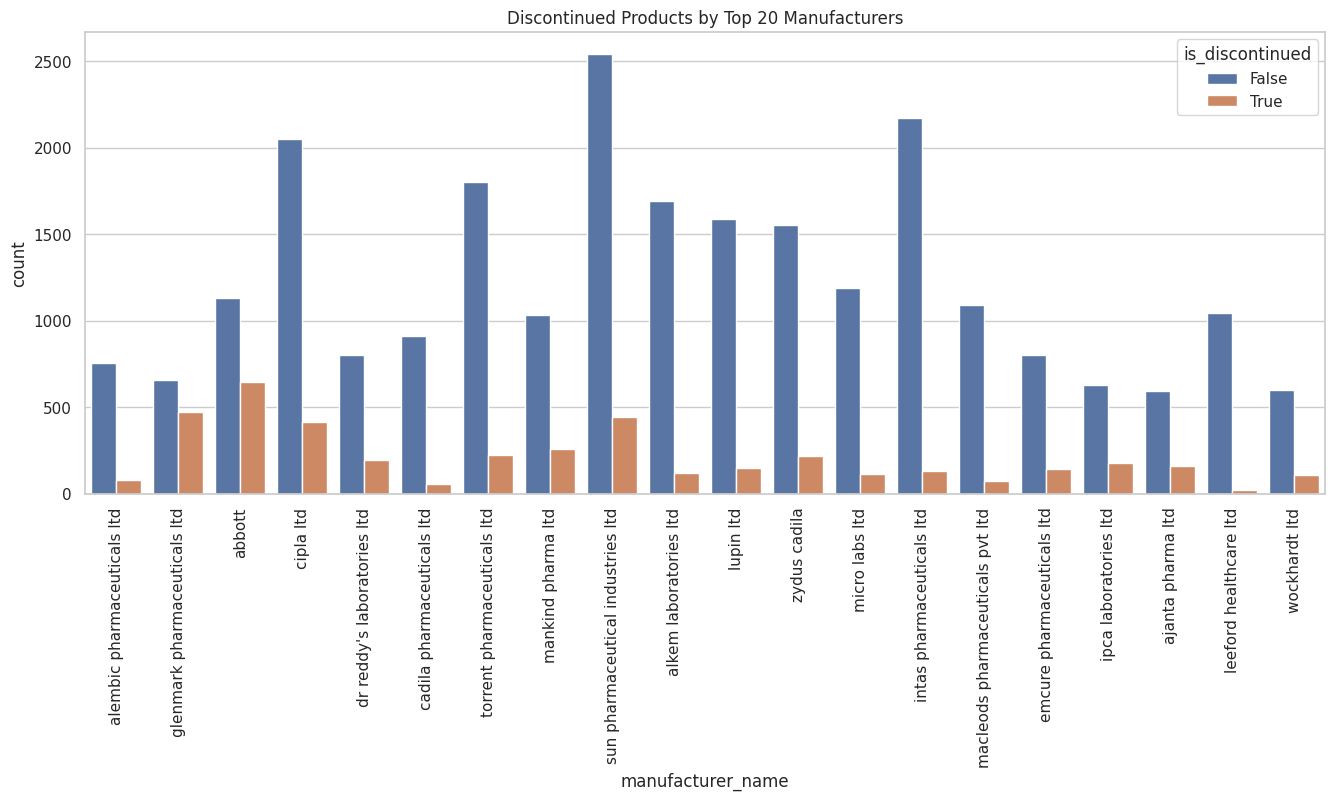

In [57]:
# Chart No.10  Data Visualization
top_manuf = df['manufacturer_name'].value_counts().head(20).index
plt.figure(figsize=(16,6))
sns.countplot(x='manufacturer_name', hue='is_discontinued', data=df[df['manufacturer_name'].isin(top_manuf)])
plt.xticks(rotation=90)
plt.title("Discontinued Products by Top 20 Manufacturers")
plt.show()


#### Why did you pick the specific chart?


A grouped bar chart is best suited because it allows us to compare active vs discontinued products across multiple manufacturers at once. This helps identify not just the volume of products but also the relative proportion of discontinued items.

####What is/are the insight(s) found from the chart?


*  **Sun Pharmaceutical Industries Ltd** has the highest number of total products but also shows a noticeable count of discontinued products.

*  **Cipla Ltd, Abbott, and Glenmark Pharmaceuticals Ltd** have comparatively higher discontinued products among the top players.

*  Some manufacturers like **Ajanta Pharma Ltd, Ipca Laboratories Ltd, and Wockhardt Ltd** have relatively fewer discontinued products, suggesting stronger product continuation.

####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Identifying companies with lower discontinuation rates can highlight more stable product pipelines and efficient lifecycle management.

*  High product discontinuation trends may signal market adaptation, R&D reallocation, or regulatory-driven changes, which can guide strategic decisions for investors, suppliers, and partners.

**Negative Insights:**

*  Manufacturers like **Cipla Ltd, Abbott, and Glenmark** show higher levels of discontinued products compared to others, which could indicate:

*  Challenges in sustaining product demand.

    Regulatory compliance issues.

    Shifts in business focus away from certain product categories.

*  High discontinuation without equivalent new product launches could negatively impact market presence and revenue streams.

### Chart-11 Top 20 Most Common Primary + Secondary Composition Combinations

In [58]:
# Count combinations
comb_counts = df.groupby(['short_composition1', 'short_composition2']).size().reset_index(name='count')

# Sort descending to get most common combinations
comb_counts_sorted = comb_counts.sort_values(by='count', ascending=False)

# Show top 20 combinations
top_combinations = comb_counts_sorted.head(20).copy()

# Now it’s safe to create a new column
top_combinations['combination'] = top_combinations['short_composition1'] + " + " + top_combinations['short_composition2'].fillna('None')


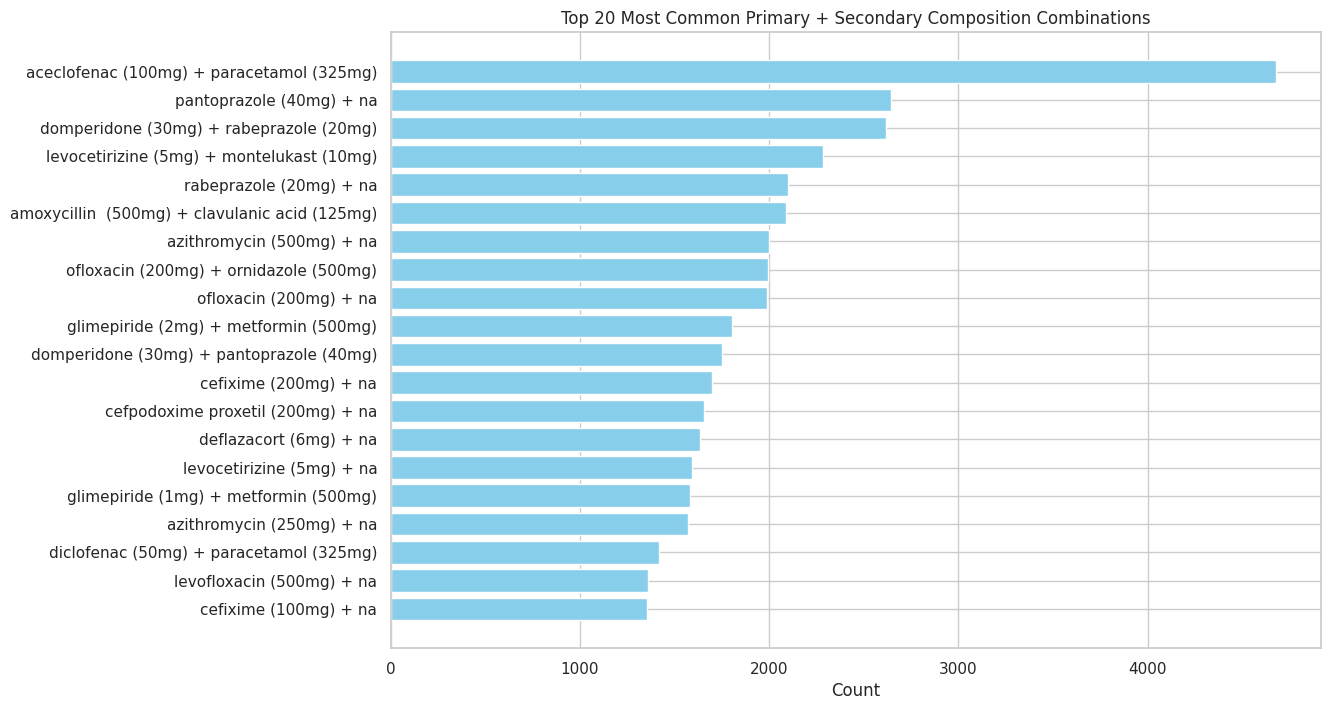

In [59]:
# Chart No.11  Data Visualization

plt.figure(figsize=(12,8))
top_combinations['combination'] = top_combinations['short_composition1'] + " + " + top_combinations['short_composition2'].fillna('None')
plt.barh(top_combinations['combination'], top_combinations['count'], color='skyblue')
plt.xlabel("Count")
plt.title("Top 20 Most Common Primary + Secondary Composition Combinations")
plt.gca().invert_yaxis()  # largest on top
plt.show()


#### Why did you pick the specific chart?


Horizontal bar charts are especially effective for ranking items by frequency, making it easy to spot which combinations dominate the market.

####What is/are the insight(s) found from the chart?


- Aceclofenac (100mg) + Paracetamol (325mg) is the clear leader, indicating high demand for pain and inflammation management.
- Pantoprazole (40mg) + Na and Domperidone (30mg) + Rabeprazole (20mg) follow closely, suggesting strong usage of gastrointestinal treatments.
- The diversity in combinations reflects a broad therapeutic landscape, with pain relief, gastric protection, and antiemetic therapies being common.




####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Inventory Optimization: Prioritize manufacturing and stocking of high-demand combinations.
- Marketing Focus: Target promotions around the most popular combinations to boost sales.
- R&D Alignment: Guide formulation development based on market preferences.
This data helps businesses stay aligned with prescriber behavior and patient needs, reducing waste and improving profitability.

**Potential for Negative Growth**

While the chart itself doesn’t directly indicate negative growth, there are risks if insights are misused:

- Overconcentration Risk: Focusing only on top combinations might neglect emerging or niche therapies, leading to missed opportunities.
- Market Saturation: Overproduction of popular combinations could lead to price wars or reduced margins.
- Regulatory Shifts: If guidelines change (e.g., limiting use of certain NSAIDs or PPIs), reliance on these combinations could backfire.
So, while the chart is a goldmine for strategic planning, it should be paired with market forecasting and regulatory awareness to avoid pitfalls.

Would you like help turning these insights into a presentation or report? I can help you structure it for stakeholders or even build a dashboard concept around it.


### *Numerical Vs Categorical*

### Chart-12  Price Distribution by Top 20 Manufacturers

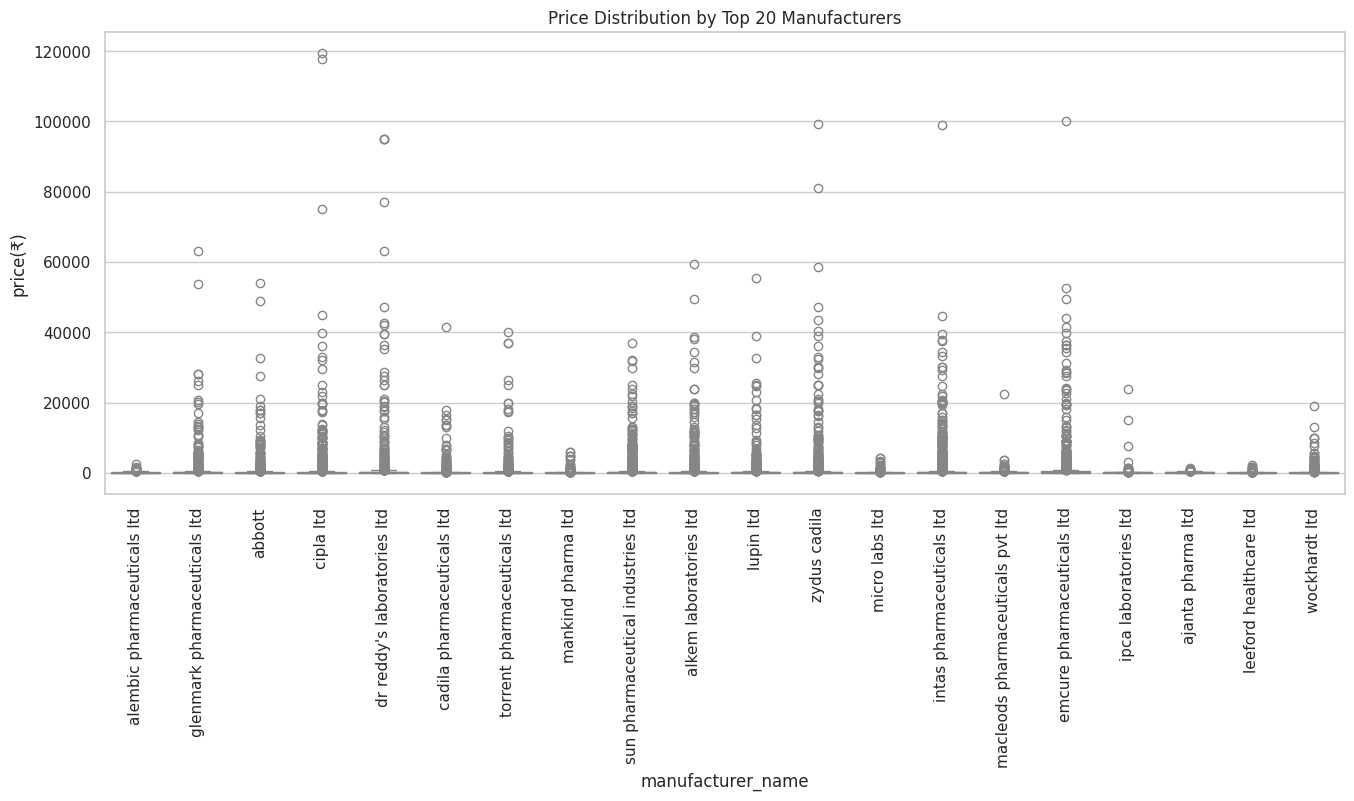

In [62]:
# Chart No.12  Data Visualization
top_manuf = df['manufacturer_name'].value_counts().head(20).index
plt.figure(figsize=(16,6))
sns.boxplot(x='manufacturer_name', y='price(₹)', data=df[df['manufacturer_name'].isin(top_manuf)],color='pink')
plt.xticks(rotation=90)
plt.title("Price Distribution by Top 20 Manufacturers")
plt.show()


#### Why did you pick the specific chart?


This chart was selected because it reveals pricing variability across manufacturers, which is crucial for understanding


####What is/are the insight(s) found from the chart?


- Wide price ranges for some manufacturers suggest a diverse product portfolio—from low-cost generics to high-margin specialty drugs.
- Tightly clustered prices for others may indicate standardized pricing, possibly due to regulatory constraints or focused product lines.
- Outliers (very high-priced products) could be patented drugs or niche treatments with limited competition.
This chart helps identify which manufacturers are price leaders, volume players, or specialty-focused.


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Competitive Benchmarking: Helps businesses position their products effectively against rivals.
- Pricing Strategy Optimization: Identifies gaps where a company can introduce mid-range or premium offerings.
- Partnership Decisions: Distributors and retailers can choose manufacturers based on pricing consistency or diversity.
It also aids policy makers and public health planners in identifying manufacturers that offer affordable options for essential medicines.

**Risks or Negative Growth Indicators**

There are a few cautionary flags:

- Extreme price outliers may attract regulatory scrutiny or reduce accessibility, especially in price-sensitive markets.
- Lack of pricing diversity could signal limited innovation or over-reliance on a narrow product base, risking stagnation.
- High variability without clear segmentation might confuse consumers or dilute brand identity.
If not managed carefully, these factors could lead to loss of market share, reputational damage, or regulatory penalties.

Would you like to combine both charts into a single dashboard or report? I can help you build a compelling narrative around these insights for business or academic use.


### Chart-13  Price Distribution: Discontinued vs Active Products

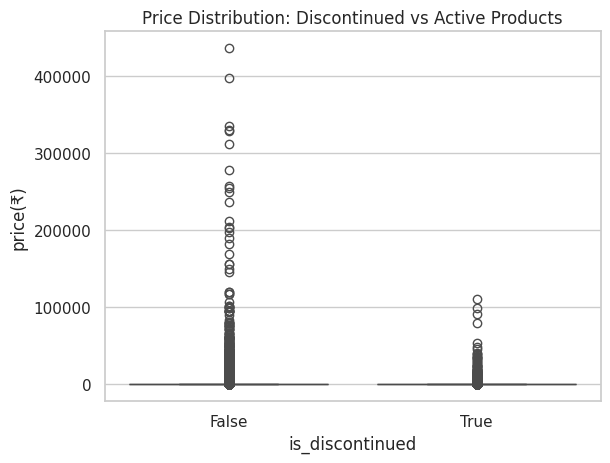

In [61]:
# Chart No.13  Data Visualization
sns.boxplot(x='is_discontinued', y='price(₹)', data=df)
plt.title("Price Distribution: Discontinued vs Active Products")
plt.show()


#### Why did you pick the specific chart?


This chart was selected because it offers a clear comparison of pricing behavior between products that are still active and those that have been discontinued.


####What is/are the insight(s) found from the chart?


- Most products—active or discontinued—are priced below ₹20,000, suggesting a concentration in affordable or generic segments.
- Discontinued products show more extreme outliers, with some priced well above ₹100,000 and even nearing ₹400,000.
- This could imply that high-priced products are more likely to be discontinued, possibly due to low demand, poor cost-effectiveness, or regulatory pressure.


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


- Portfolio Review: Helps identify pricing thresholds that may lead to product discontinuation.
- Strategic Pricing: Encourages pricing within sustainable ranges to avoid market rejection.
- Product Development: Guides future launches toward price points that align with longevity and demand.
This chart supports data-driven decisions on pricing and lifecycle management, which can improve profitability and reduce sunk costs.

**Insights That May Indicate Negative Growth**

Definitely some red flags:

- High-priced discontinued products suggest that expensive offerings may not be viable unless they deliver exceptional value or target niche markets.
- If active products begin to mimic the pricing of discontinued ones, it could signal future risk.
- Lack of mid-range pricing might indicate a missing segment, leading to lost opportunities.
These insights highlight the importance of price sensitivity and market fit—critical factors in avoiding product failure.



### Chart-14 Price Distribution of Top 20 Medicines

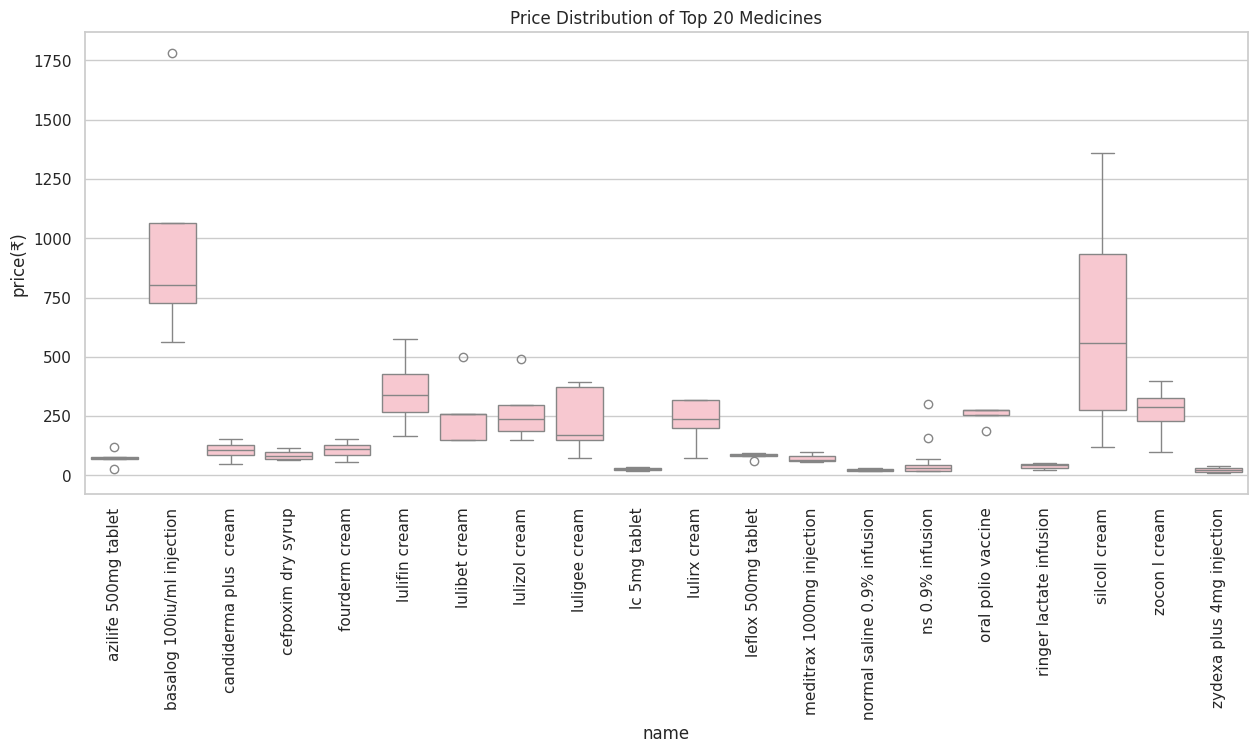

In [60]:
# Chart No.14  Data Visualization

# Top 20 medicines by count
top_meds = df['name'].value_counts().head(20).index

# Filter dataframe
df_top_meds = df[df['name'].isin(top_meds)]

# Boxplot of price distribution for top 20 medicines
plt.figure(figsize=(15,6))
sns.boxplot(x='name', y='price(₹)', data=df_top_meds,color='pink')
plt.xticks(rotation=90)
plt.title("Price Distribution of Top 20 Medicines")
plt.show()


#### Why did you pick the specific chart?


This chart was selected because it provides a granular view of price variability across individual medicines. Box plots are perfect for showing:
- Median price
- Interquartile range (IQR)
- Outliers
This helps stakeholders understand not just average pricing, but how consistent or volatile pricing is for each product.




####What is/are the insight(s) found from the chart?


- Wide price ranges for medicines like azilife 500mg tablet, ringer lactate infusion, and meditrax 1000mg injection suggest high variability, possibly due to different pack sizes, formulations, or vendor pricing.
- Tightly clustered prices for products like normal saline 0.9% infusion, oral polio vaccine, and lc 5mg tablet indicate standardized pricing, likely driven by government regulation or essential medicine status.
- Outliers in some products (e.g., azilife and meditrax) may reflect premium variants or pricing inefficiencies


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Pricing Strategy: Identify which products allow for flexible pricing and which require tighter control.
- Cost Optimization: Target high-variability products for pricing audits or procurement renegotiation.
- Market Segmentation: Use pricing spread to position products for different consumer segments.
This chart helps businesses balance affordability with profitability, especially in competitive or regulated markets.

**Risks or Negative Growth Indicators**

- Excessive price variability may confuse consumers or erode trust, especially in essential medicines.
- Outliers could indicate poor pricing governance or supply chain inefficiencies.
- Low-priced products with narrow margins (e.g., oral polio vaccine) may be vulnerable to cost shocks or supply disruptions.
If not managed carefully, these factors could lead to margin erosion, regulatory scrutiny, or loss of market share.


### Chart-15 Top 20 Most Expensive Medicines

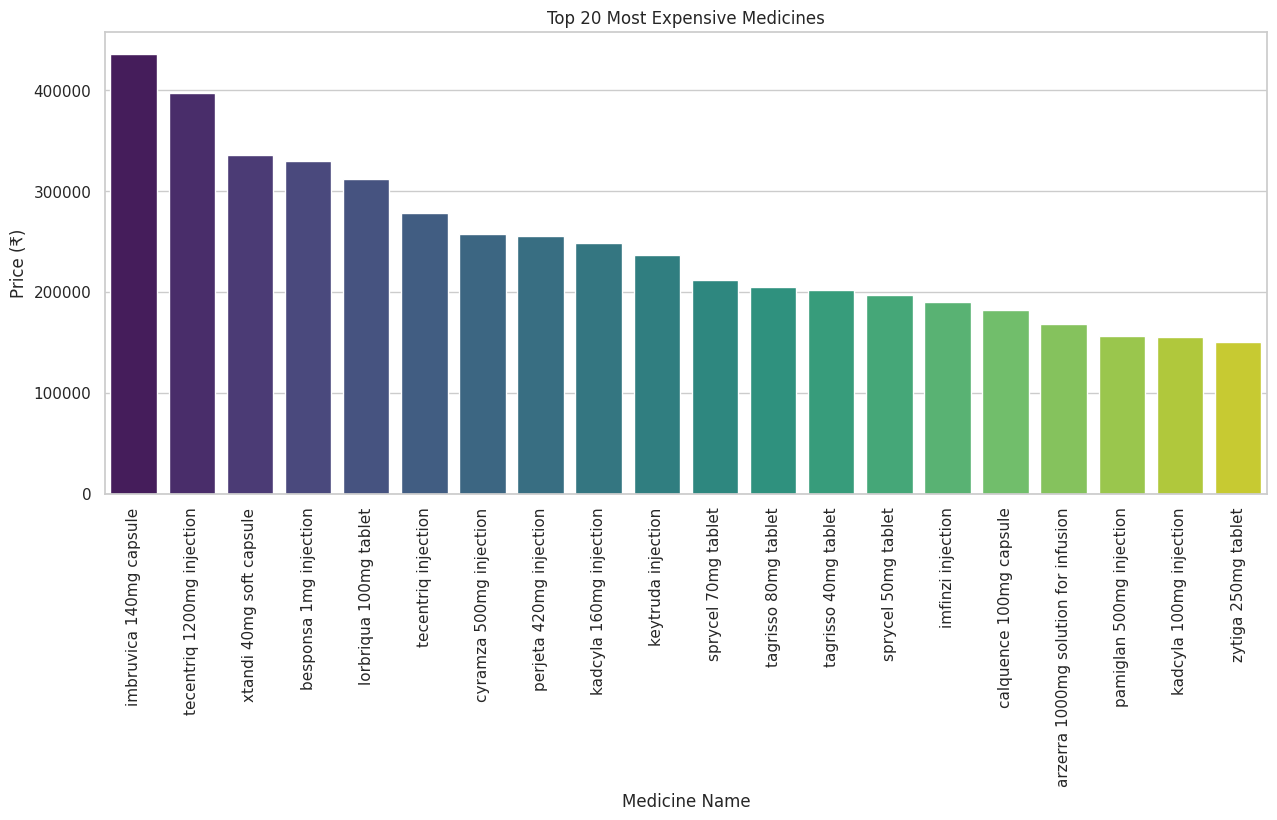

In [63]:
# Chart No.15  Data Visualization

# Get top 20 most expensive medicines
top_expensive_meds = df[['name', 'price(₹)']].sort_values(by='price(₹)', ascending=False).drop_duplicates('name').head(20)

# Plot
plt.figure(figsize=(15,6))
sns.barplot(x='name', y='price(₹)', data=top_expensive_meds, palette='viridis',hue='name',legend=False)
plt.xticks(rotation=90)
plt.title("Top 20 Most Expensive Medicines")
plt.ylabel("Price (₹)")
plt.xlabel("Medicine Name")

# Add price values on top of bars
# for index, row in top_expensive_meds.iterrows():
#     plt.text(x=index % 20, y=row['price(₹)']+5, s=f"{row['price(₹)']:.2f}", ha='center')

plt.show()


#### Why did you pick the specific chart?


Bar charts are perfect for ranking and comparing values, making this format ideal for spotlighting top-tier pricing.

####What is/are the insight(s) found from the chart?


- **Imbruvica 140mg capsule** tops the list, followed by **Tecentriq 1200mg injection** and **Xtandi 40mg soft capsule**, all priced in the upper ₹100,000+ range.
- The majority of these medicines are oncology or immunotherapy drugs, reflecting the high cost of cutting-edge treatments.
- Injectables dominate the list, suggesting that formulation type plays a role in pricing—likely due to manufacturing complexity and clinical use cases.
This chart reveals a clear premium segment in the pharmaceutical market, driven by innovation and specialized therapies.


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Revenue Strategy: These products offer high margins, making them key revenue drivers.
- Brand Prestige: Premium pricing can reinforce brand value and innovation leadership.
- Investor Appeal: High-value products attract investment and partnerships in biotech and pharma.
These insights help businesses prioritize R&D, target affluent markets, and justify premium pricing through clinical value.


**Risks or Negative Growth Indicators:**

- Affordability Concerns: High prices may limit access, especially in public health systems or low-income markets.
- Regulatory Risk: Premium drugs often face scrutiny over pricing, especially if outcomes don’t justify cost.
- Market Saturation: If competitors launch biosimilars or generics, these products may lose pricing power.
So while these medicines are lucrative, they require careful market positioning and value communication to avoid backlash or stagnation.


### *Boolean vs Categorical / Numerical*

### Chart-16 Proportion of Discontinued Products by Top 20 Manufacturers

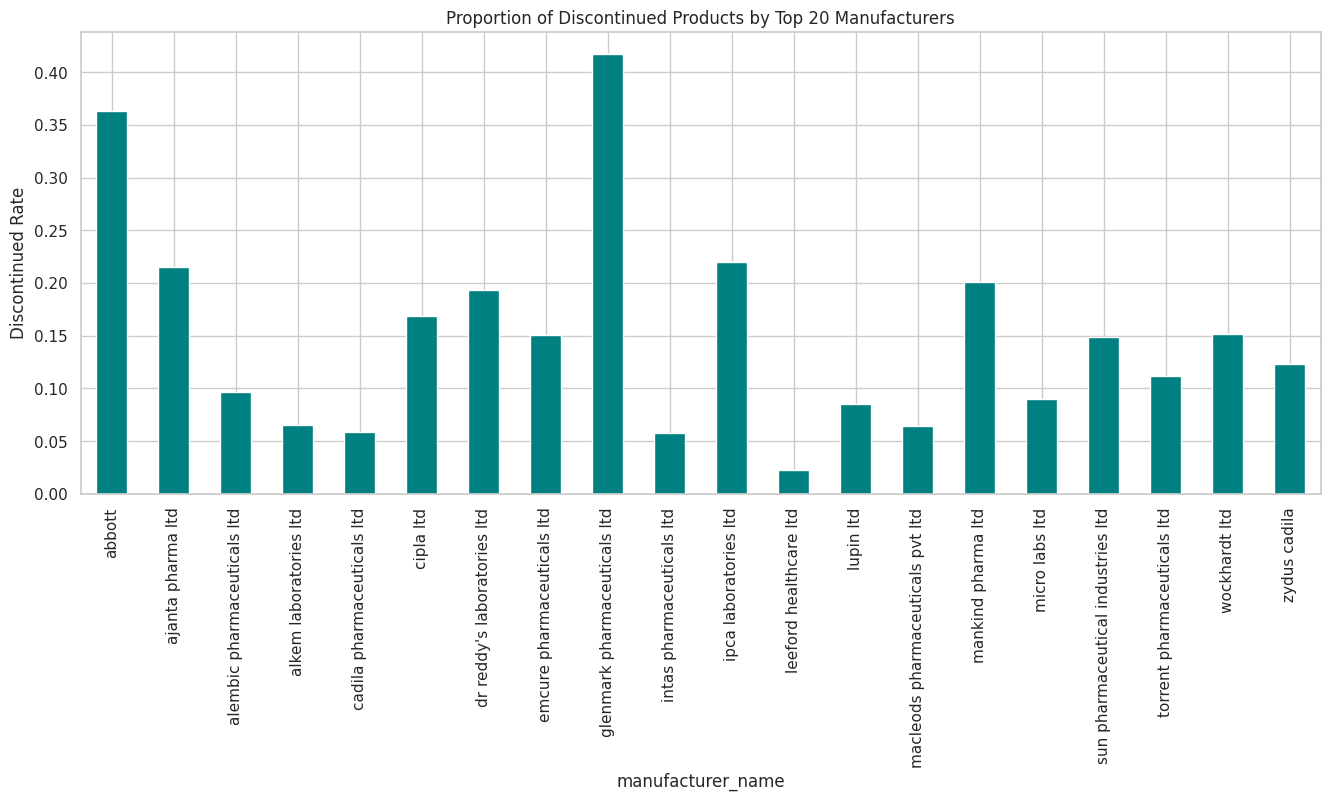

In [64]:
# Chart No.16  Data Visualization
top_manuf = df['manufacturer_name'].value_counts().head(20).index
discontinued_rate = df[df['manufacturer_name'].isin(top_manuf)].groupby('manufacturer_name')['is_discontinued'].mean()
discontinued_rate.plot(kind='bar', color='teal',figsize=(16,6))
plt.ylabel("Discontinued Rate")
plt.title("Proportion of Discontinued Products by Top 20 Manufacturers")
plt.show()



#### Why did you pick the specific chart?


Bar charts are ideal for comparing proportions across categories, making this format perfect for spotlighting discontinuation trends.

####What is/are the insight(s) found from the chart?


- **Glenmark Pharmaceuticals Ltd** has the highest discontinuation rate, followed by **Abbott and Mankind Pharma Ltd**.
- Companies like **Cipla, Sun Pharma, and Lupin** show relatively lower discontinuation rates, suggesting more stable portfolios.
- A high discontinuation rate may reflect aggressive experimentation, regulatory challenges, or market misalignment.


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Strategic Planning: Companies can benchmark their discontinuation rates to assess portfolio health.
- Risk Management: Helps identify manufacturers with volatile pipelines, guiding partnership or investment decisions.
- Innovation Signals: High churn may indicate a willingness to innovate and pivot quickly.
This data supports smarter decisions in supply chain planning, regulatory forecasting, and competitive analysis.

**Risks or Negative Growth Indicators:**

Definitely some cautionary flags:

- High discontinuation rates may signal poor market fit, regulatory issues, or unsustainable pricing.
- Frequent product exits can erode brand trust and disrupt supply chains.
- If discontinuations cluster around specific therapeutic areas, it could indicate declining demand or clinical ineffectiveness.
These insights suggest that while innovation is valuable, stability and strategic alignment are equally critical for long-term growth.



## **Multivariate Analysis**

### Chart-17 Price by Primary and Secondary Composition

In [ ]:
# Chart No.  Data Visualization
top_comp1 = df['short_composition1'].value_counts().head(10).index
top_comp2 = df['short_composition2'].value_counts().head(10).index
plt.figure(figsize=(15,6))
sns.boxplot(x='short_composition1', y='price(₹)', hue='short_composition2', data=df[df['short_composition1'].isin(top_comp1) & df['short_composition2'].isin(top_comp2)])
plt.xticks(rotation=90)
plt.title("Price by Primary and Secondary Composition")
plt.show()


#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart-18 Heatmap Discontinued Rate by Manufacturer and Pack Size

In [ ]:
# Chart No.  Data Visualization
top_manuf = df['manufacturer_name'].value_counts().head(10).index
top_pack = df['pack_size_label'].value_counts().head(10).index
ct = pd.crosstab(df[df['manufacturer_name'].isin(top_manuf) & df['pack_size_label'].isin(top_pack)]['manufacturer_name'],
                 df[df['manufacturer_name'].isin(top_manuf) & df['pack_size_label'].isin(top_pack)]['pack_size_label'],
                 values=df['is_discontinued'], aggfunc='mean')
sns.heatmap(ct, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Discontinued Rate by Manufacturer and Pack Size")
plt.show()


#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Chart

In [ ]:
# Chart No.  Data Visualization

#### Why did you pick the specific chart?


####What is/are the insight(s) found from the chart?


####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.